In [13]:
# !mim download mmdet --config mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco --dest ./checkpoints
!mim download mmdet --config sparse-rcnn_r50_fpn_ms-480-800-3x_coco --dest ./checkpoints

processing sparse-rcnn_r50_fpn_ms-480-800-3x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.8/405.8 MiB 8.7 MB/s eta 0:00:0000:0100:02
Successfully downloaded sparse_rcnn_r50_fpn_mstrain_480-800_3x_coco_20201218_154234-7bc5c054.pth to /Users/wangleyang/Desktop/王乐阳/综合/复旦/研一下/nn&dl/mid_term/nn_ml_mid_term_task2/mmdetection/checkpoints
Successfully dumped sparse-rcnn_r50_fpn_ms-480-800-3x_coco.py to /Users/wangleyang/Desktop/王乐阳/综合/复旦/研一下/nn&dl/mid_term/nn_ml_mid_term_task2/mmdetection/checkpoints


In [14]:
import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
# Choose to use a config and initialize the detector
config_file_mask_rcnn = 'configs/mask_rcnn/mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py'
config_file_sparse_rcnn = 'configs/sparse_rcnn/sparse-rcnn_r50_fpn_ms-480-800-3x_coco.py'
# Setup a checkpoint file to load
checkpoint_file_mask_rcnn = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'
checkpoint_file_sparse_rcnn = 'checkpoints/sparse_rcnn_r50_fpn_mstrain_480-800_3x_coco_20201218_154234-7bc5c054.pth'

# register all modules in mmdet into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model_mask_rcnn = init_detector(config_file_mask_rcnn, checkpoint_file_mask_rcnn, device='cpu')  # or device='cuda:0'
model_sparse_rcnn = init_detector(config_file_mask_rcnn, checkpoint_file_mask_rcnn, device='cpu')  # or device='cuda:0'


Loads checkpoint by local backend from path: checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Loads checkpoint by local backend from path: checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


# 推理代码

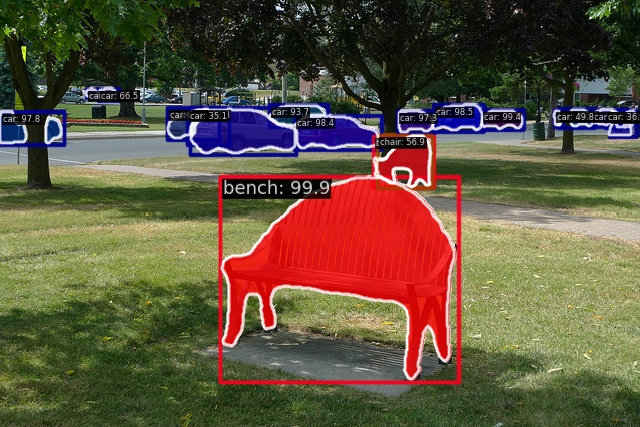

In [12]:
from mmdet.registry import VISUALIZERS
import mmcv
import os
import matplotlib.pyplot as plt
from PIL import Image
import sys

# 判断是否在 Jupyter Notebook
def is_notebook():
    try:
        shell = get_ipython().__class__.__name__
        return shell in ['ZMQInteractiveShell', 'Shell']
    except NameError:
        return False

def infer_detect_picture(model, image_file_path='demo/demo.jpg', out_file='result_demo.jpg'):
    image = mmcv.imread(image_file_path, channel_order='rgb')
    result = inference_detector(model, image)
    
    visualizer = VISUALIZERS.build(model.cfg.visualizer)
    visualizer.dataset_meta = model.dataset_meta

    # 保存可视化图像到文件
    visualizer.add_datasample(
        'result',
        image,
        data_sample=result,
        draw_gt=False,
        show=False,
        out_file=out_file,
    )

    # 自动显示
    if is_notebook():
        # 在 notebook 中显示图像
        from IPython.display import display
        display(Image.open(out_file))
    else:
        # 在终端显示图像
        img = mmcv.imread(out_file, channel_order='rgb')
        plt.imshow(img)
        plt.axis('off')
        plt.title('Detection Result')
        plt.show()
infer_detect_picture(model_mask_rcnn)

/Users/wangleyang/opt/anaconda3/envs/mmdet/lib/python3.8/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


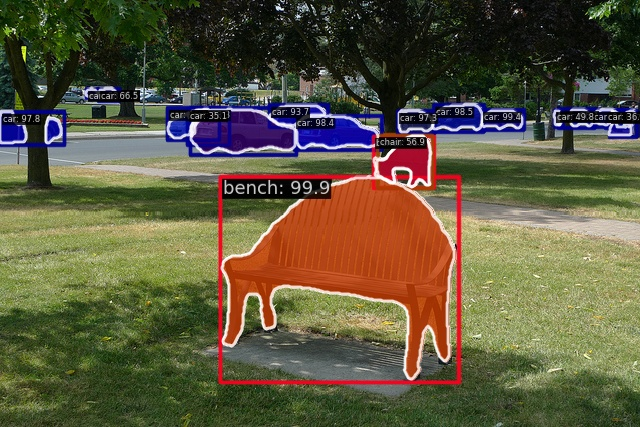

In [15]:
infer_detect_picture(model_sparse_rcnn)

# 训练代码